In [1]:
# Proje 1: Görüntü Sınıflandırma (Model 2 - Temel CNN)

**Adı:** İbrahim
**Soyadı:** KARAKUZU
**Okul Numarası:** 2112721018
**GitHub Repo Bağlantısı:** [Linkiniz]

SyntaxError: invalid syntax (3029205260.py, line 3)

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# GPU Kontrolü (Hata almamak için try-except bloğu)
try:
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        print(f"✅ GPU Algılandı: {gpus[0].name}")
    else:
        print("⚠️ GPU Bulunamadı (CPU kullanılacak)")
except:
    print("⚠️ GPU kontrolü sırasında hata oluştu, CPU ile devam ediliyor.")

# Ayarlar
DATASET_PATH = 'dataset'
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 15  # Sıfırdan eğittiğimiz için epoch sayısını biraz artırdık

✅ GPU Algılandı: /physical_device:GPU:0


In [3]:
# Model 2 için sadece piksel normalizasyonu yapıyoruz (Veri Artırma YOK)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

num_classes = len(train_generator.class_indices)
print(f"Sınıf Sayısı: {num_classes}")

Found 178 images belonging to 2 classes.
Found 43 images belonging to 2 classes.
Sınıf Sayısı: 2


In [4]:
model = models.Sequential([
    # 1. Konvolüsyon Bloğu
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    # 2. Konvolüsyon Bloğu
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # 3. Konvolüsyon Bloğu
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Sınıflandırma Katmanı
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\karakuzuibrahim\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Model 2 Eğitimi Başlıyor...
Epoch 1/15


c:\Users\karakuzuibrahim\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.6438 - loss: 0.6404 - val_accuracy: 0.7812 - val_loss: 0.4143
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7188 - loss: 0.3585 - val_accuracy: 0.7812 - val_loss: 0.3759
Epoch 3/15
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.7500 - loss: 0.3915

c:\Users\karakuzuibrahim\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9062 - loss: 0.3478 - val_accuracy: 0.9062 - val_loss: 0.2590
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.1293 - val_accuracy: 0.9062 - val_loss: 0.2234
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9658 - loss: 0.0927 - val_accuracy: 0.9062 - val_loss: 0.2555
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9375 - loss: 0.1472 - val_accuracy: 0.8750 - val_loss: 0.2139
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9658 - loss: 0.0706 - val_accuracy: 0.9688 - val_loss: 0.0832
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9688 - loss: 0.0315 - val_accuracy: 0.8438 - val_loss: 0.4477
Epoch 9/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9726 - loss: 0.0664 - val_accuracy: 0.9375 - val_loss: 0.1859
Epoch 10/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0222 - val_accuracy: 0.9688 - val_loss: 0.1050
Epoch 11/1

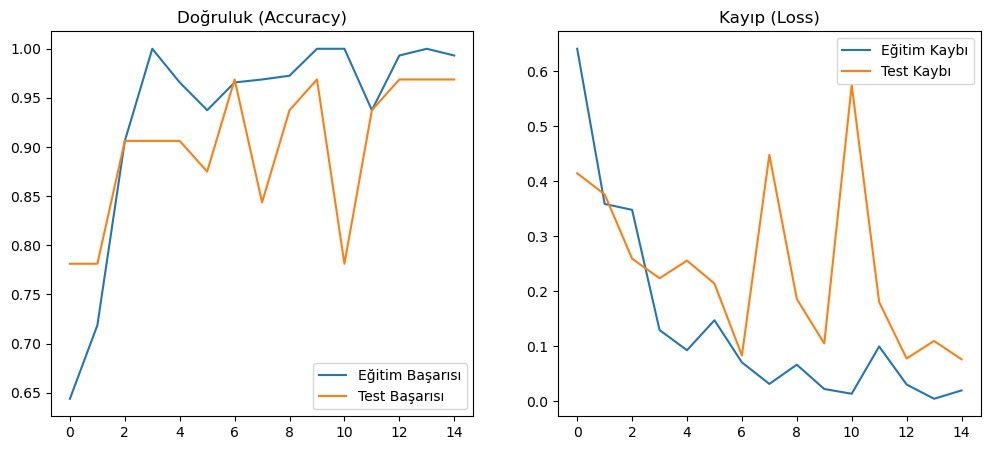

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9535 - loss: 0.0905

📢 Model2 (Basit CNN) Test Doğruluğu: %95.35


In [5]:
print("Model 2 Eğitimi Başlıyor...")

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)

# Grafikleri Çizdir
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Başarısı')
plt.plot(epochs_range, val_acc, label='Test Başarısı')
plt.title('Doğruluk (Accuracy)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, label='Test Kaybı')
plt.title('Kayıp (Loss)')
plt.legend()
plt.show()

# Test Sonucu
loss, accuracy = model.evaluate(validation_generator)
print(f"\n📢 Model2 (Basit CNN) Test Doğruluğu: %{accuracy * 100:.2f}")